# Imports

In [1]:
import sys
sys.path.append("../src")

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

# Our code
from generate_prediction import load_dataset, features_expert

# Loading dataset

In [3]:
train_path = "../data/normalized_train.csv"

In [4]:
features = features_expert()
X, y = load_dataset(train_path, training=True, features=features)

# Logistic regression

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21, 52)
(21,)
(8, 52)
(8,)


## Define the models

In [7]:
clf_l1_LR = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, multi_class='multinomial')
clf_l2_LR = LogisticRegression(penalty='l2', solver='saga', max_iter=1000, multi_class='multinomial')

## Train models

In [8]:
clf_l1_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
clf_l2_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

## Test models

In [10]:
predictions_l1 = clf_l1_LR.predict(X_test)
predictions_l2 = clf_l2_LR.predict(X_test)

In [11]:
score_l1 = clf_l1_LR.score(X_test, y_test)
print(score_l1)

0.875


In [12]:
score_l2 = clf_l2_LR.score(X_test, y_test)
print(score_l1)

0.875


## Confusion matrix

In [13]:
cm_l1 = metrics.confusion_matrix(y_test, predictions_l1)
print(cm_l1)

[[1 0 0]
 [0 2 0]
 [1 0 4]]


In [14]:
cm_l2 = metrics.confusion_matrix(y_test, predictions_l2)
print(cm_l2)

[[1 0 0]
 [0 2 0]
 [1 0 4]]


## Probabilities

In [15]:
clf_l1_LR.predict_proba(X_test)

array([[0.86230557, 0.03739448, 0.10029996],
       [0.27337021, 0.03049928, 0.69613051],
       [0.09159338, 0.08862209, 0.81978452],
       [0.00776793, 0.98180414, 0.01042793],
       [0.02649785, 0.89534061, 0.07816154],
       [0.20725518, 0.06970694, 0.72303788],
       [0.22189117, 0.03718964, 0.74091919],
       [0.52166641, 0.1094074 , 0.3689262 ]])

# Validation with KFold

In [16]:
n_splits = 5
min_iter = 0
max_iter = 4
kfold_accuracy_l1 = []
kfold_f1_l1 = []
kfold_accuracy_l2 = []
kfold_f1_l2 = []

for k_C in range(min_iter,max_iter+1):
    kf = KFold(n_splits=n_splits)
    accuracy_l1 = []
    f1_l1 = []
    accuracy_l2 = []
    f1_l2 = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Trainning
        clf_l1_LR = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, multi_class='multinomial', C=10**-k_C)
        clf_l2_LR = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial', C=10**-k_C)
        
        clf_l1_LR.fit(X_train, y_train)
        clf_l2_LR.fit(X_train, y_train)

        #Accuraccy and F1 score
        y_predict_l1 = clf_l1_LR.predict(X_test)
        accuracy_l1.append(clf_l2_LR.score(X_test, y_test))
        f1_l1.append(f1_score(y_test, y_predict_l1, average='micro'))

        y_predict_l2 = clf_l1_LR.predict(X_test)
        accuracy_l2.append(clf_l2_LR.score(X_test, y_test))
        f1_l2.append(f1_score(y_test, y_predict_l2, average='micro'))
        
    kfold_accuracy_l1.append(np.mean(accuracy_l1))
    kfold_f1_l1.append(np.mean(f1_l1))
    kfold_accuracy_l2.append(np.mean(accuracy_l2))
    kfold_f1_l2.append(np.mean(f1_l2))
        

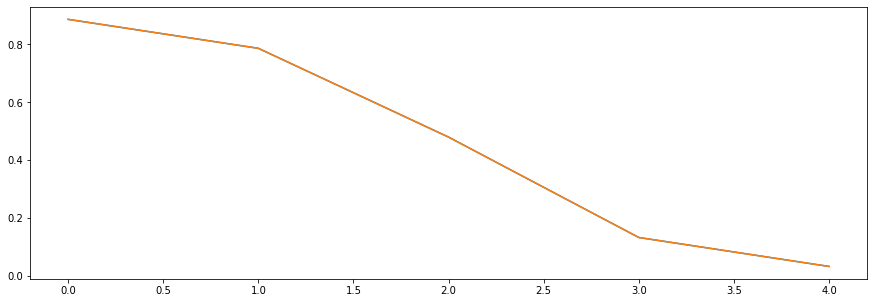

In [17]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l1)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l2)
plt.show()

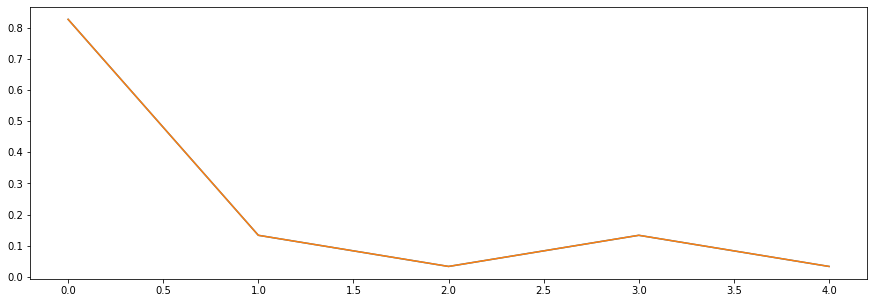

In [18]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l1)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l2)
plt.show()

# Logisitc regression with selected features

In [19]:
X_selected, y_selected = load_dataset(train_path, training=True, features=features)

# Validation with KFold

In [20]:
n_splits = 5
min_iter = 2
max_iter = 6
kfold_accuracy_l1_s = []
kfold_f1_l1_s = []
kfold_accuracy_l2_s = []
kfold_f1_l2_s = []

for k in range(min_iter,max_iter+1):
    kf = KFold(n_splits=n_splits)
    accuracy_l1 = []
    f1_l1 = []
    accuracy_l2 = []
    f1_l2 = []
    
    for train_index, test_index in kf.split(X_selected):
        X_train, X_test = X_selected[train_index], X_selected[test_index]
        y_train, y_test = y_selected[train_index], y_selected[test_index]

        # Trainning
        clf_l1_LR = LogisticRegression(penalty='l1', solver='saga', max_iter=10**k, multi_class='multinomial', C=1)
        clf_l2_LR = LogisticRegression(penalty='l2', solver='saga', max_iter=10**k, multi_class='multinomial', C=1)
        
        clf_l1_LR.fit(X_train, y_train)
        clf_l2_LR.fit(X_train, y_train)

        #Accuraccy and F1 score
        y_predict_l1 = clf_l1_LR.predict(X_test)
        accuracy_l1.append(clf_l2_LR.score(X_test, y_test))
        f1_l1.append(f1_score(y_test, y_predict_l1, average='micro'))

        y_predict_l2 = clf_l1_LR.predict(X_test)
        accuracy_l2.append(clf_l2_LR.score(X_test, y_test))
        f1_l2.append(f1_score(y_test, y_predict_l2, average='micro'))
        
    kfold_accuracy_l1_s.append(np.mean(accuracy_l1))
    kfold_f1_l1_s.append(np.mean(f1_l1))
    kfold_accuracy_l2_s.append(np.mean(accuracy_l2))
    kfold_f1_l2_s.append(np.mean(f1_l2))
        

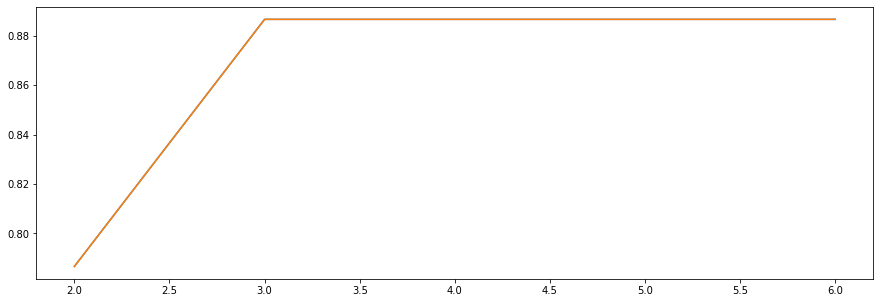

In [21]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l1_s)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_accuracy_l2_s)
plt.show()

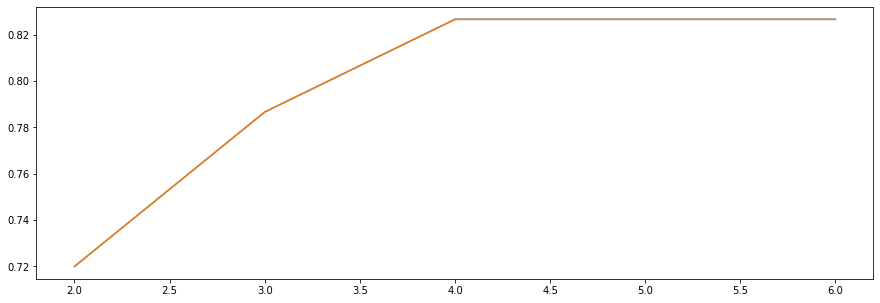

In [22]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l1_s)
plt.plot(np.arange(min_iter,max_iter+1,1), kfold_f1_l2_s)
plt.show()

In [23]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'f1_macro']
clf = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial', C=1)
scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
for key in scores:
    print(key+' : '+str(scores[key].mean()))

fit_time : 0.06740655899047851
score_time : 0.0008790016174316407
test_accuracy : 0.9266666666666667
test_f1_macro : 0.9199999999999999


In [24]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'f1_macro']
clf = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, multi_class='multinomial', C=1)
scores = cross_validate(clf, X_selected, y_selected, cv=5, scoring=scoring)
for key in scores:
    print(key+' : '+str(scores[key].mean()))

fit_time : 0.06704707145690918
score_time : 0.0008646965026855469
test_accuracy : 0.9266666666666667
test_f1_macro : 0.9199999999999999
